<a href="https://colab.research.google.com/github/ladofa/edu/blob/master/Example_pose_tflite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 본 편 데이터 https://www.tensorflow.org/lite/examples/pose_estimation/overview?hl=ko
# 현재 개발중인 내용 https://github.com/google-coral/project-posenet
!wget https://storage.googleapis.com/download.tensorflow.org/models/tflite/posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite
model_path = 'posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite'

--2022-03-03 06:01:37--  https://storage.googleapis.com/download.tensorflow.org/models/tflite/posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.98.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13269068 (13M) [application/octet-stream]
Saving to: ‘posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite.1’

posenet_mobilenet_v 100%[===================>]  12.65M  --.-KB/s    in 0.1s    

2022-03-03 06:01:37 (122 MB/s) - ‘posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite.1’ saved [13269068/13269068]



In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_height = input_details[0]['shape'][1]
input_width = input_details[0]['shape'][2]

In [4]:
input_details

[{'dtype': numpy.float32,
  'index': 93,
  'name': 'sub_2',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([  1, 257, 257,   3], dtype=int32),
  'sparsity_parameters': {}}]

In [5]:
output_details

[{'dtype': numpy.float32,
  'index': 87,
  'name': 'MobilenetV1/heatmap_2/BiasAdd',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1,  9,  9, 17], dtype=int32),
  'shape_signature': array([ 1,  9,  9, 17], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 90,
  'name': 'MobilenetV1/offset_2/BiasAdd',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1,  9,  9, 34], dtype=int32),
  'shape_signature': array([ 1,  9,  9, 34], dtype=int32),
  'sparsity_parameters': {}},
 {'dtype': numpy.float32,
  'index': 84,
  'name': 'MobilenetV1/displacement_fwd_2/BiasAdd',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_

In [6]:
!wget https://www.nba.com/magic/sites/magic/files/gettyimages-1206486934.jpg
image = cv2.imread("gettyimages-1206486934.jpg")
image.shape

--2022-03-03 06:01:42--  https://www.nba.com/magic/sites/magic/files/gettyimages-1206486934.jpg
Resolving www.nba.com (www.nba.com)... 104.87.84.52, 2600:1402:b800:989::1f51, 2600:1402:b800:980::1f51
Connecting to www.nba.com (www.nba.com)|104.87.84.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54539 (53K) [image/jpeg]
Saving to: ‘gettyimages-1206486934.jpg.1’

gettyimages-1206486 100%[===================>]  53.26K  --.-KB/s    in 0.03s   

2022-03-03 06:01:42 (1.71 MB/s) - ‘gettyimages-1206486934.jpg.1’ saved [54539/54539]



(800, 533, 3)

In [7]:
!wget https://static.turbosquid.com/Preview/2015/03/25__11_13_14/1.jpg24ba1906-5acd-490e-971e-0cabc0c2a415Zoom.jpg
image = cv2.imread('1.jpg24ba1906-5acd-490e-971e-0cabc0c2a415Zoom.jpg')
image.shape

--2022-03-03 06:01:43--  https://static.turbosquid.com/Preview/2015/03/25__11_13_14/1.jpg24ba1906-5acd-490e-971e-0cabc0c2a415Zoom.jpg
Resolving static.turbosquid.com (static.turbosquid.com)... 13.226.50.39, 13.226.50.80, 13.226.50.109, ...
Connecting to static.turbosquid.com (static.turbosquid.com)|13.226.50.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182990 (179K) [image/jpeg]
Saving to: ‘1.jpg24ba1906-5acd-490e-971e-0cabc0c2a415Zoom.jpg.3’

1.jpg24ba1906-5acd- 100%[===================>] 178.70K  --.-KB/s    in 0.05s   

2022-03-03 06:01:43 (3.64 MB/s) - ‘1.jpg24ba1906-5acd-490e-971e-0cabc0c2a415Zoom.jpg.3’ saved [182990/182990]



(1024, 1024, 3)

In [8]:
input_image = cv2.resize(image, (input_width, input_height))
input_image = np.float32(input_image)
input_image = (input_image / 127.5) - 1
input_image = input_image[None, :, :, [2, 1, 0]]


In [9]:
interpreter.set_tensor(input_details[0]['index'], input_image)
# Run the calculations
interpreter.invoke()
# Extract output data from the interpreter
scores = interpreter.get_tensor(output_details[0]['index'])[0]
offsets = interpreter.get_tensor(output_details[1]['index'])[0]


In [10]:
dh = scores.shape[0]
dw = scores.shape[1]
dp = scores.shape[2]
scores_reshape = scores.reshape(dh * dw, -1)
arg_y, arg_x = np.unravel_index(scores_reshape.argmax(0), (dh, dw))
off_y = offsets[arg_y, arg_x, np.arange(dp)]
off_x = offsets[arg_y, arg_x, np.arange(dp, dp * 2)]
conf = scores[arg_y, arg_x, np.arange(dp)]
#sigmoid
conf = 1 / (1 + np.exp(-conf))

print(conf)

point_x = (arg_x / (dw - 1) * input_width + off_x) / input_width * image.shape[1]
point_y = (arg_y / (dh - 1) * input_height + off_y) / input_height * image.shape[0]
points = [(int(x), int(y)) for x, y in zip(point_x, point_y)]

[0.99977964 0.99732625 0.9982497  0.817645   0.93078005 0.98976594
 0.970205   0.9494609  0.9181214  0.99447435 0.9868197  0.9514531
 0.889214   0.977357   0.97388715 0.9764946  0.8824297 ]


In [11]:
from enum import Enum
import math

class Part(Enum):
    NOSE = 0
    LEFT_EYE = 1
    RIGHT_EYE = 2
    LEFT_EAR = 3
    RIGHT_EAR = 4
    LEFT_SHOULDER = 5
    RIGHT_SHOULDER = 6
    LEFT_ELBOW = 7
    RIGHT_ELBOW = 8
    LEFT_WRIST = 9
    RIGHT_WRIST = 10
    LEFT_HIP = 11
    RIGHT_HIP = 12
    LEFT_KNEE = 13
    RIGHT_KNEE = 14
    LEFT_ANKLE = 15
    RIGHT_ANKLE = 16


connections = [
    (Part.LEFT_EAR, Part.LEFT_EYE ),
    (Part.LEFT_EYE, Part.NOSE ),
    (Part.NOSE, Part.RIGHT_EYE ),
    (Part.RIGHT_EYE, Part.RIGHT_EAR ),

    (Part.LEFT_ELBOW, Part.LEFT_WRIST ),
    (Part.LEFT_ELBOW, Part.LEFT_SHOULDER ),
    (Part.LEFT_HIP, Part.LEFT_SHOULDER ),
    (Part.LEFT_HIP, Part.LEFT_KNEE ),
    (Part.LEFT_KNEE, Part.LEFT_ANKLE ),

    (Part.RIGHT_HIP, Part.RIGHT_SHOULDER ),
    (Part.RIGHT_ELBOW, Part.RIGHT_SHOULDER ),
    (Part.RIGHT_ELBOW, Part.RIGHT_WRIST ),
    (Part.RIGHT_HIP, Part.RIGHT_KNEE ),
    (Part.RIGHT_KNEE, Part.RIGHT_ANKLE ),

    (Part.LEFT_SHOULDER, Part.RIGHT_SHOULDER ),
    (Part.LEFT_HIP, Part.RIGHT_HIP)
]

colors = [
    (0, 255, 255),
    (0, 255, 255),
    (0, 255, 255),
    (0, 255, 255),
    
    (0, 0, 255),
    (0, 64, 255),
    (0, 128, 255),
    (64, 64, 255),
    (128, 0, 255),

    (255, 0, 0),
    (255, 64, 0),
    (255, 128, 0),
    (255, 64, 64),
    (255, 0, 128),

    (128, 255, 0),
    (0, 255, 128)
]

def sigmoid(x):
	return (1 / (1 + math.exp(-x)))

def draw_a_pose(image, points, conf, th = 0.5):
    for con, color in zip(connections, colors):
        c0 = conf[con[0].value]
        c1 = conf[con[1].value]
        if c0 < th or c1 < th:
            color = (0, 0, 0)
        p0 = points[con[0].value]
        p1 = points[con[1].value]
        cv2.line(image, p0, p1, color, thickness=2)

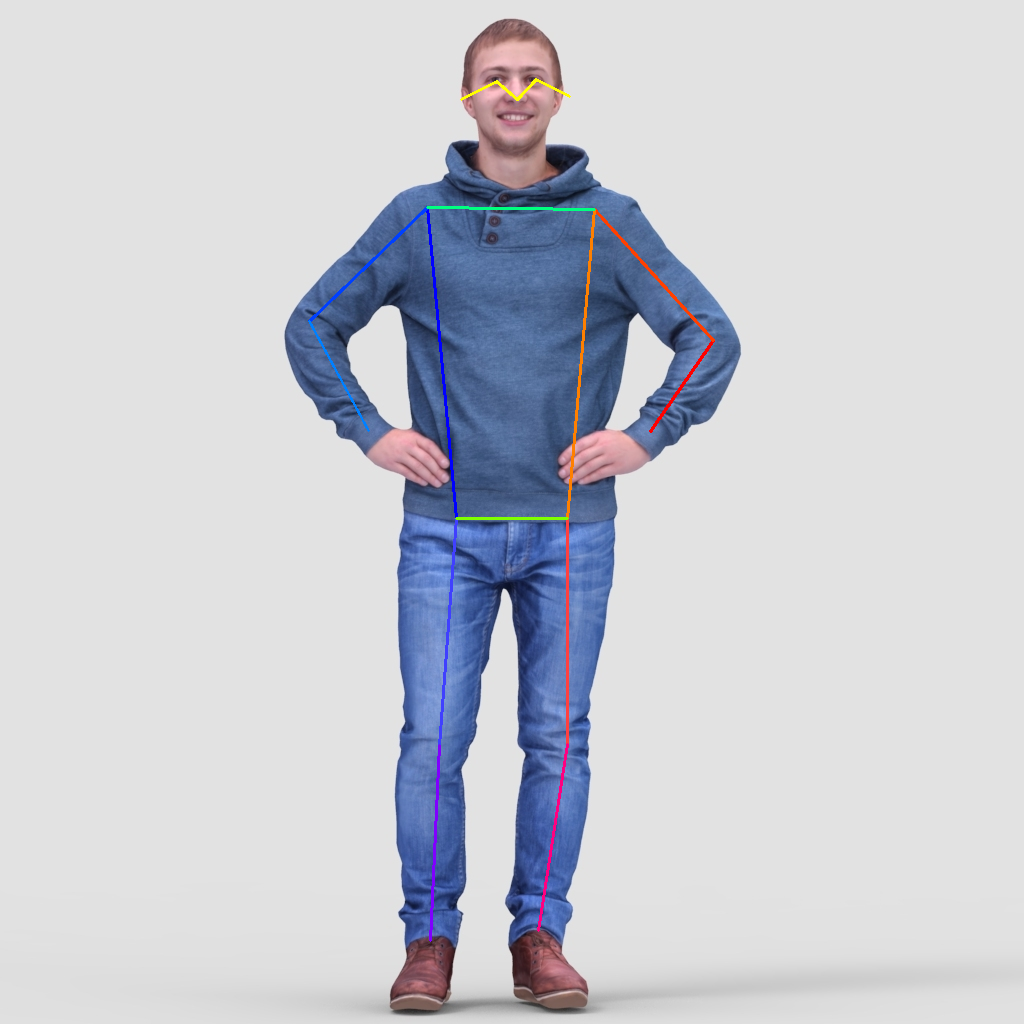

In [12]:
dst = image.copy()
draw_a_pose(dst, points, conf)
cv2_imshow(dst)

In [15]:
heatmap = 1 / (1 + np.exp(-scores))

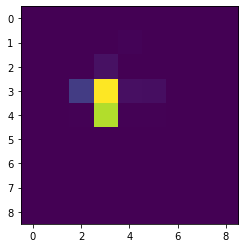

In [16]:
plt.imshow(heatmap[:, :, 10])